<h2> Before running, choose 'GPU' from Edit >  Notebook Settings above

<h2> Options

<h3> If you would like to apply your own style, change the value below and choose your file in the notebook when it runs.
  
 Otherwise, choose one from the list below when you run the notebook. (From Runtime > Run All above)

In [0]:
style_from_local = False

1 - La Muse
2 - Rain Princess
3 - Scream
4 - Udnie
5 - Wave
6 - Wreck

In [2]:
choice = int(input('Enter number:'))-1

Enter number:3


<h3> If you would like to use a locally saved image, change the value below and choose your file in the notebook when it runs.
  
 Otherwise, just paste the link to your image below or use the sample link provided.

In [0]:
image_from_local = False

image_url = 'https://d2v9y0dukr6mq2.cloudfront.net/video/thumbnail/BKaAXTX/4k-toronto-skyline-from-lake-ontario-with-tall-ships-and-cn-tower_mj3-v5fd__F0000.png'

<h2> Setup

In [4]:
import os

if not os.path.isdir("fast-style-transfer"):
  !git clone https://github.com/rlaze/fast-style-transfer

print("In 'fast-style-transfer' folder:")
!ls fast-style-transfer

Cloning into 'fast-style-transfer'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 205 (delta 1), reused 3 (delta 1), pack-reused 201
Receiving objects: 100% (205/205), 11.01 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (92/92), done.
In 'fast-style-transfer' folder:
docs.md      optimize.py  setup.sh  transform.py	utils.py
evaluate.py  README.md	  style.py  transform_video.py	vgg.py


In [6]:
# images from urls or local, use ver below

if not os.path.isdir("In"):
  os.mkdir ('In')

if (image_from_local):
  print('Choose the image file to upload:')
  from google.colab import files
  files.upload()
  !ls
  file_name = input('Enter the name of the file you uploaded:   ')
  !cp $file_name In/Content.jpg
else:
  import requests
  Content_url = image_url # url to image here
  with open('In/Content.jpg', 'wb') as handle:
          response = requests.get(Content_url, stream=True)
          if not response.ok:
              print (response)
          for block in response.iter_content(1024):
              if not block:
                  break
              handle.write(block)
              
print("In 'In' folder")
!ls In

In 'In' folder
Content.jpg


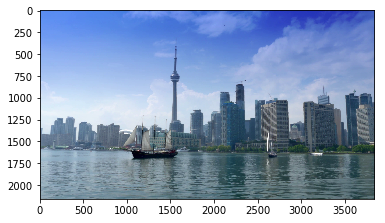

In [7]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('In/Content.jpg', 'r')
imshow(np.asarray(pil_im))

<h2> Using style

In [8]:
# upload checkpoint

if(style_from_local):
  
  from google.colab import files
  files.upload()
  !ls
  file_name = input('Enter file name:   ')
  
else:
  # style files from google drive
  style_names = ['la_muse.ckpt', 
                 'rain_princess.ckpt',
                 'scream.ckpt',
                 'udnie.ckpt',
                 'wave.ckpt',
                 'wreck.ckpt'
                ]
  # links to source files location
  style_urls = ['https://drive.google.com/open?id=0B9jhaT37ydSyQU1sYW02Sm9kV3c',
                'https://drive.google.com/open?id=0B9jhaT37ydSyaEJlSFlIeUxweGs',
                'https://drive.google.com/open?id=0B9jhaT37ydSyZ0RyTGU0Q2xiU28',
                'https://drive.google.com/open?id=0B9jhaT37ydSyb0NuYmk2ZEpOR0E',
                'https://drive.google.com/open?id=0B9jhaT37ydSyVGk0TC10bDF1S28',
                'https://drive.google.com/open?id=0B9jhaT37ydSySjNrM3J5N2gweVk'
               ]
  # id from link
  style_ids = ['0B9jhaT37ydSyQU1sYW02Sm9kV3c',
               '0B9jhaT37ydSyaEJlSFlIeUxweGs',
               '0B9jhaT37ydSyZ0RyTGU0Q2xiU28',
               '0B9jhaT37ydSyb0NuYmk2ZEpOR0E',
               '0B9jhaT37ydSyVGk0TC10bDF1S28',
               '0B9jhaT37ydSySjNrM3J5N2gweVk'
              ]
  
  file_name = style_names[choice]
  
  
  from google_drive_downloader import GoogleDriveDownloader as gdd

  gdd.download_file_from_google_drive(file_id=style_ids[choice],
                                      dest_path='./'+style_names[choice],
                                      unzip=False)
      
  !ls

fast-style-transfer  In  sample_data  scream.ckpt


In [9]:
# takes a style network, applies on image(s) in 'Out' directory

if not os.path.isdir("Out"):
  os.mkdir ('Out')

# other params: --batch-size (def 4) --allow-different-dimensions (def not enabled, used when multiple in dir)
!python fast-style-transfer/apply.py --checkpoint $file_name --in-path 'In/' --out-path 'Out/' --device /gpu:0


2019-04-12 00:21:38.256697: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-12 00:21:38.257312: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x31251e0 executing computations on platform Host. Devices:
2019-04-12 00:21:38.257356: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-12 00:21:38.448759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-12 00:21:38.449442: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3124c60 executing computations on platform CUDA. Devices:
2019-04-12 00:21:38.449484: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-04-12 00:21:38.449951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found d

<h2> After

<h2> To resize the image below, change the value below and rerun the next 2 cells.

In [0]:
shrink = 3 # size is 1/3, use 1 for full size

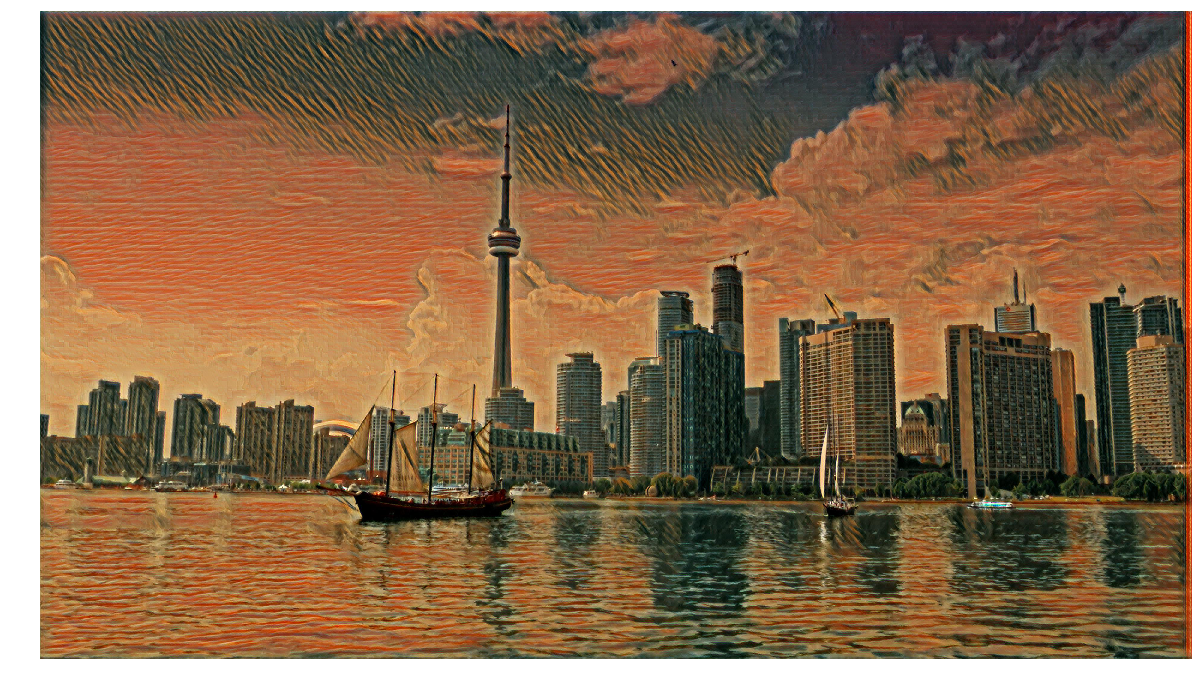

In [13]:
# show large size image

from matplotlib import pyplot as plt

def display_image_big(im_path, ratio):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width/ratio / float(dpi), height/ratio / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_big("Out/Content.jpg", shrink)

In [12]:
if(input('Keep image? y/n:   ') == 'y'):
  from google.colab import files
  files.download('Out/Content.jpg') 

Keep image? y/n:   n
